In [0]:
from google.colab import drive
import pandas as pd
import numpy as np

import datadotworld as dw

In [0]:
data = dw.load_dataset('datafiniti/womens-shoe-prices')

In [11]:
data.dataframes

LazyLoadedDict({'7003_1': LazyLoadedValue(<pandas.DataFrame>), 'datafiniti_womens_shoes': LazyLoadedValue(<pandas.DataFrame>), 'datafiniti_womens_shoes_jun19': LazyLoadedValue(<pandas.DataFrame>)})

In [12]:
df = data.dataframes['7003_1']
df.shape

(19045, 47)

In [15]:
df.sample(5)

,id,asins,brand,categories,colors,count,dateadded,dateupdated,descriptions,dimension,ean,features,flavors,imageurls,isbn,keys,manufacturer,manufacturernumber,merchants,name,prices_amountmin,prices_amountmax,prices_availability,prices_color,prices_condition,prices_count,prices_currency,prices_dateadded,prices_dateseen,prices_flavor,prices_issale,prices_merchant,prices_offer,prices_returnpolicy,prices_shipping,prices_size,prices_source,prices_sourceurls,prices_warranty,quantities,reviews,sizes,skus,sourceurls,upc,websiteids,weight
14433,AVpe4tF-LJeJML43xgNO,NaN,Walking Cradles,"Clothing,Shoes,Women's Shoes,All Women's Shoes",Gray,NaN,2016-11-07 19:00:21,2016-11-07 19:00:21,"[{""dateSeen"":[""2016-11-07T19:00:21Z""],""sourceU...",NaN,6.574770e+11,"[{""key"":""Heel Height"",""value"":[""Low (3/4 in. t...",NaN,https://i5.walmartimages.com/asr/4df250df-213c...,NaN,"657476758609,0657476758609,walkingcradles/w53209m",Walking Cradles,W-53209M,"[{""dateSeen"":[""2016-11-07T19:00:21Z""],""name"":""...",Walking Cradles Felt Round Toe Synthetic Flats,100,100,NaN,NaN,new,NaN,USD,2016-11-07T19:00:21Z,2016-11-06T00:00:00Z,NaT,FALSE,ApparelSave - Walmart.com,NaN,NaN,NaN,NaN,NaN,https://www.walmart.com/ip/Walking-Cradles-Fel...,NaN,NaN,NaN,6.5,NaN,https://www.walmart.com/ip/Walking-Cradles-Fel...,6.57477E+11,NaN,NaN
8595,AVpe6-kf1cnluZ0-Z4La,NaN,Stoosh,"Clothing, Shoes & Accessories,Women's Clothing...",Black,NaN,2016-09-03 17:59:42,2016-10-05 15:13:44,"[{""dateSeen"":[""2016-10-05T15:13:43Z""],""sourceU...",NaN,8.874510e+11,"[{""key"":""Style"",""value"":[""Casual Pants""]},{""ke...",NaN,http://i.ebayimg.com/images/g/Da0AAOSw8gVX6hOJ...,NaN,stoosh6490womensblacktexturedprintedflatfrontl...,NaN,NaN,"[{""dateSeen"":[""2016-10-04T00:00:00Z""],""name"":""...",Stoosh 6490 Womens Black Textured Printed Flat...,8,8,NaN,NaN,New with tags,NaN,USD,2016-09-03T17:59:42Z,2016-09-03T17:59:42Z,NaT,FALSE,NaN,winning bid,NaN,USD 5.99,NaN,NaN,http://www.ebay.com/itm/Stoosh-6490-Womens-Bla...,NaN,NaN,NaN,NaN,"[{""sourceURLs"":[""http://www.ebay.com/itm/Stoos...",http://www.ebay.com/itm/Stoosh-6490-Womens-Bla...,8.87451E+11,NaN,NaN
249,AVpfLa4k1cnluZ0-flSB,NaN,Olivia Miller,"Women's Sandals,Shoes,Clothing,Women's Shoes","Black,Cognac",NaN,2017-01-27 01:31:11,2017-01-27 01:31:11,"[{""dateSeen"":[""2017-01-27T01:31:11Z""],""sourceU...",NaN,6.574860e+11,"[{""key"":""Gender"",""value"":[""Women""]},{""key"":""Sh...",NaN,https://i5.walmartimages.com/asr/5845a05d-78cf...,NaN,"oliviamiller/omm9870cognac10,657486388063,0657...",Olivia Miller,OMM-9870_COGNAC_10,"[{""dateSeen"":[""2017-01-27T01:31:11Z""],""name"":""...",Olivia Miller Women's 'catania' Sandals,26.37,26.37,NaN,NaN,new,NaN,USD,2017-01-27T01:31:11Z,2017-01-25T00:00:00Z,NaT,TRUE,Purchase Pals LLC - Walmart.com,REDUCED USD 15.63,NaN,NaN,NaN,NaN,https://www.walmart.com/ip/Olivia-Miller-Women...,NaN,NaN,NaN,NaN,NaN,https://www.walmart.com/ip/Olivia-Miller-Women...,6.57486E+11,NaN,NaN
17129,AVpfbNzfilAPnD_xbjfx,NaN,Mara Hoffman,"Clothing, Shoes & Accessories,Women's Clothing...",Black,NaN,2016-03-06 00:19:28,2016-05-02 03:00:04,NaN,NaN,8.492260e+11,"[{""key"":""Style"",""value"":[""Swim Top Separates""]...",NaN,http://i.ebayimg.com/images/g/NwIAAOSwh-1W2Pil...,NaN,"0849226020429,marahoffman7104newwomensblacktri...",NaN,NaN,"[{""dateSeen"":[""2016-04-29T00:00:00Z""],""name"":""...",Mara Hoffman 7104 New Womens Black Triangle St...,39.97,39.97,NaN,NaN,New with tags,NaN,USD,2016-03-06T00:19:28Z,2016-04-29T00:00:00Z,NaT,FALSE,NaN,winning bid,NaN,USD 4.99,NaN,NaN,http://www.ebay.com/itm/MARA-HOFFMAN-7104-NEW-...,NaN,NaN,NaN,NaN,"[{""sourceURLs"":[""http://www.ebay.com/itm/MARA-...",http://www.ebay.com/itm/MARA-HOFFMAN-7104-NEW-...,8.49226E+11,NaN,NaN
2888,AVpfR81EilAPnD_xYvWH,NaN,Sam Edelman,"Women,Shoes,Boots",NaN,NaN,2016-03-30 02:15:48,2016-03-30 02:20:51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,samedelman/384908,NaN,384908,NaN,'louie' Boot,139.95,139.95,NaN,NaN,NaN,NaN,USD,2016-03-30T02:15:48Z,2016-03-29T00:00:00Z,NaT,FALSE,NaN,

In [14]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'websiteids', 'weight'],
      dtype='object')

In [16]:
df.prices_currency.unique()

array(['USD', 'CAD', 'AUD', 'EUR', nan, 'GBP',
       'Off Price Direct - Walmart.com', 'new'], dtype=object)

In [17]:
df.prices_currency.value_counts()

USD                               18199
CAD                                 638
AUD                                 118
EUR                                  64
GBP                                  15
Off Price Direct - Walmart.com        1
new                                   1
Name: prices_currency, dtype: int64

In [18]:
df.prices_currency.value_counts(normalize=True)

USD                               0.956031
CAD                               0.033515
AUD                               0.006199
EUR                               0.003362
GBP                               0.000788
Off Price Direct - Walmart.com    0.000053
new                               0.000053
Name: prices_currency, dtype: float64

In [22]:
df_usd = df[ df.prices_currency == 'USD'].copy()
df_usd.shape

(18199, 47)

In [23]:
df_usd.prices_amountmin.head()

0    71.99
1      250
2    75.99
3    79.98
4    26.98
Name: prices_amountmin, dtype: object

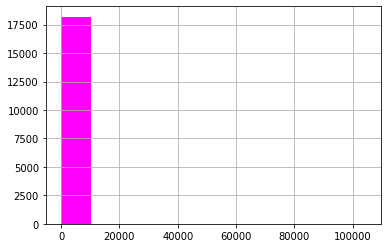

In [27]:
df_usd['prices_amountmin'] = df_usd.prices_amountmin.astype(np.float)
df_usd.prices_amountmin.hist(color="magenta")

In [0]:
filter_max = np.percentile(df_usd['prices_amountmin'], 99)
df_usd_filter = df_usd[ df_usd['prices_amountmin'] < filter_max]

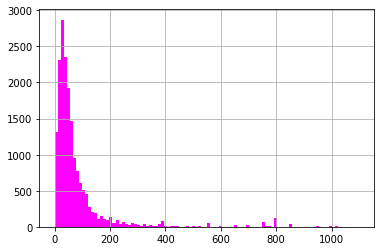

In [31]:
df_usd_filter.prices_amountmin.hist(color='magenta', bins=100)

In [0]:
df.to_csv('data/shoes_prices_women.csv', index=False)

In [0]:
!git a